# Analiziranje podatkov glede na višino

Naložimo ustrezne pakete

In [376]:
# naložimo pakete
import os
import pandas as pd

nov_directory = 'obdelani podatki'
csv_drzave = 'drzave.csv'
csv_kontinenti = 'kontinenti.csv'
# izberemo interaktivni 'notebook' stil risanja
%matplotlib inline

pd.set_option('display.max_rows', 15)
path1 = os.path.join(nov_directory, csv_drzave) 
path2 = os.path.join(nov_directory, csv_kontinenti) 

#naložimo razpredelnico, s katero bomo delali
countries = pd.read_csv(path1)
continents = pd.read_csv(path2)

In [377]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


## 1. Splošno

### 1.1. Države

V spodnjih tabelah je prikazan seznam vseh držav, ki sem jih zajela v svoji projektni nalogi. Vsebuje podatke o višini, teži in ITM-ju tako moških kot žensk. V tej datoteki sem se osredotočila na analiziranje podatkov višine.

In [378]:
countries.index += 1
countries

,ime države,višina moških,teža moških,ITM moških,višina žensk,teža žensk,ITM žensk
1,Netherlands,1.84,87.9,26.1,1.70,73.2,25.3
2,Montenegro,1.83,90.4,27.0,1.70,75.3,26.2
3,Estonia,1.82,89.9,27.0,1.68,73.7,26.0
4,Denmark,1.82,86.8,26.3,1.69,70.2,24.6
5,Bosnia and Herzegovina,1.82,87.1,26.4,1.67,70.6,25.3
...,...,...,...,...,...,...,...
123,Nepal,1.64,60.5,22.5,1.52,51.6,22.3
124,Guatemala,1.64,69.1,25.7,1.51,61.9,27.3
125,Yemen,1.63,62.5,23.6,1.54,56.9,24.0
126,Laos,1.62,59.5,22.6,1.53,53.7,23.0


In [379]:
countries.head(15)

,ime države,višina moških,teža moških,ITM moških,višina žensk,teža žensk,ITM žensk
1,Netherlands,1.84,87.9,26.1,1.70,73.2,25.3
2,Montenegro,1.83,90.4,27.0,1.70,75.3,26.2
3,Estonia,1.82,89.9,27.0,1.68,73.7,26.0
4,Denmark,1.82,86.8,26.3,1.69,70.2,24.6
5,Bosnia and Herzegovina,1.82,87.1,26.4,1.67,70.6,25.3
6,Iceland,1.81,89.2,27.1,1.68,72.6,25.6
7,Czechia,1.81,91.9,28.1,1.68,74.2,26.4
8,Slovenia,1.81,87.0,26.6,1.67,74.2,26.6
9,Slovakia,1.81,89.5,27.4,1.67,71.3,25.6
10,Croatia,1.81,91.3,28.0,1.67,74.7,26.9


In [380]:
countries.tail(15)

,ime države,višina moških,teža moških,ITM moških,višina žensk,teža žensk,ITM žensk
113,Burundi,1.67,60.5,21.8,1.55,51.5,21.5
114,Pakistan,1.67,64.7,23.3,1.54,58.9,24.7
115,Brunei,1.66,74.7,27.1,1.55,65.0,27.2
116,Myanmar,1.66,61.1,22.2,1.54,54.7,23.0
117,India,1.66,59.6,21.7,1.55,52.5,21.9
118,Indonesia,1.66,61.4,22.4,1.54,56.2,23.7
119,Cambodia,1.65,59.7,22.0,1.54,52.8,22.2
120,Madagascar,1.65,58.4,21.5,1.53,49.2,21.1
121,Philippines,1.65,61.8,22.8,1.54,55.5,23.5
122,Bangladesh,1.65,57.7,21.3,1.52,50.5,21.8


In [381]:
countries.describe() #quick overview

,višina moških,teža moških,ITM moških,višina žensk,teža žensk,ITM žensk
count,127.00000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,1.73685,78.915748,26.053543,1.612598,68.922047,26.422047
std,0.05279,11.275169,2.701992,0.045812,9.825016,3.007686
min,1.59000,53.900000,20.100000,1.510000,49.000000,21.000000
25%,1.70000,70.500000,24.250000,1.580000,62.150000,24.400000
50%,1.74000,81.400000,26.600000,1.610000,70.300000,26.300000
75%,1.78000,87.600000,27.600000,1.650000,74.150000,27.850000
max,1.84000,103.700000,33.100000,1.700000,98.100000,35.200000


In [382]:
countries.memory_usage(deep=True)

Index             132
ime države       8251
višina moških    1016
teža moških      1016
ITM moških       1016
višina žensk     1016
teža žensk       1016
ITM žensk        1016
dtype: int64

Nadaljnje tabele prikazujejo države urejene po višini. Vidimo lahko, da so izmed vseh držav najvišji moški na Nizozemskem in enako velja za ženske. Najnižji moški se po podatkih nahajajo v Vzhodnem Timorju, ženske pa v Gvatemali.        

In [383]:
countries.sort_values(by='višina moških', ascending = False, inplace = True)
countries
print(countries.head(5))
countries['višina moških']

               ime države  višina moških  teža moških  ITM moških  \
1             Netherlands           1.84         87.9        26.1   
2              Montenegro           1.83         90.4        27.0   
3                 Estonia           1.82         89.9        27.0   
4                 Denmark           1.82         86.8        26.3   
5  Bosnia and Herzegovina           1.82         87.1        26.4   

   višina žensk  teža žensk  ITM žensk  
1          1.70        73.2       25.3  
2          1.70        75.3       26.2  
3          1.68        73.7       26.0  
4          1.69        70.2       24.6  
5          1.67        70.6       25.3  


1      1.84
2      1.83
3      1.82
4      1.82
5      1.82
       ... 
123    1.64
124    1.64
125    1.63
126    1.62
127    1.59
Name: višina moških, Length: 127, dtype: float64

In [384]:
countries.sort_values(by='višina žensk', ascending = False, inplace = True)
countries
print(countries.head(5))
countries['višina žensk']

     ime države  višina moških  teža moških  ITM moških  višina žensk  \
1   Netherlands           1.84         87.9        26.1          1.70   
2    Montenegro           1.83         90.4        27.0          1.70   
4       Denmark           1.82         86.8        26.3          1.69   
18       Latvia           1.80         87.9        27.1          1.68   
3       Estonia           1.82         89.9        27.0          1.68   

    teža žensk  ITM žensk  
1         73.2       25.3  
2         75.3       26.2  
4         70.2       24.6  
18        74.5       26.4  
3         73.7       26.0  


1      1.70
2      1.70
4      1.69
18     1.68
3      1.68
       ... 
126    1.53
122    1.52
123    1.52
127    1.52
124    1.51
Name: višina žensk, Length: 127, dtype: float64

In [385]:
countries.sort_values(by='višina moških', ascending = True, inplace = True)
countries
print(countries.head(5))
countries['višina moških']

     ime države  višina moških  teža moških  ITM moških  višina žensk  \
127  East Timor           1.59         53.9        21.2          1.52   
126        Laos           1.62         59.5        22.6          1.53   
125       Yemen           1.63         62.5        23.6          1.54   
124   Guatemala           1.64         69.1        25.7          1.51   
123       Nepal           1.64         60.5        22.5          1.52   

     teža žensk  ITM žensk  
127        49.0       21.2  
126        53.7       23.0  
125        56.9       24.0  
124        61.9       27.3  
123        51.6       22.3  


127    1.59
126    1.62
125    1.63
124    1.64
123    1.64
       ... 
3      1.82
4      1.82
5      1.82
2      1.83
1      1.84
Name: višina moških, Length: 127, dtype: float64

In [386]:
countries.sort_values(by='višina žensk', ascending = True, inplace = True)
countries
print(countries.head(5))
countries['višina žensk']

     ime države  višina moških  teža moških  ITM moških  višina žensk  \
124   Guatemala           1.64         69.1        25.7          1.51   
127  East Timor           1.59         53.9        21.2          1.52   
123       Nepal           1.64         60.5        22.5          1.52   
122  Bangladesh           1.65         57.7        21.3          1.52   
126        Laos           1.62         59.5        22.6          1.53   

     teža žensk  ITM žensk  
124        61.9       27.3  
127        49.0       21.2  
123        51.6       22.3  
122        50.5       21.8  
126        53.7       23.0  


124    1.51
127    1.52
123    1.52
122    1.52
126    1.53
       ... 
3      1.68
18     1.68
4      1.69
2      1.70
1      1.70
Name: višina žensk, Length: 127, dtype: float64

### 1.2. Kontinenti

Analogno kot pri državah je v spodnjih tabelah prikazan seznam delov kontinentov, ki sem jih zajela v svoji projektni nalogi. Vsebuje podatke o višini in teži tako moških kot žensk. V tej datoteki sem se osredotočila na analiziranje podatkov višine.

In [387]:
continents.index += 1
continents

,del kontinenta,višina moških,teža moških,višina žensk,teža žensk
1,Northern Africa,1.73,77.9,1.61,73.7
2,Eastern Africa,1.67,60.1,1.57,56.2
3,Western Africa,1.70,64.9,1.59,60.1
4,Southern Africa,1.69,71.2,1.59,73.2
5,Central Africa,1.69,62.6,1.58,58.0
...,...,...,...,...,...
18,Northern Europe,1.79,87.1,1.65,72.3
19,Eastern Europe,1.78,83.8,1.65,72.2
20,Polynesia,1.76,93.8,1.65,87.3
21,Melanesia,1.64,68.1,1.57,64.6


In [388]:
continents.head(5)

,del kontinenta,višina moških,teža moških,višina žensk,teža žensk
1,Northern Africa,1.73,77.9,1.61,73.7
2,Eastern Africa,1.67,60.1,1.57,56.2
3,Western Africa,1.70,64.9,1.59,60.1
4,Southern Africa,1.69,71.2,1.59,73.2
5,Central Africa,1.69,62.6,1.58,58.0


In [389]:
continents.tail(5)

,del kontinenta,višina moških,teža moških,višina žensk,teža žensk
18,Northern Europe,1.79,87.1,1.65,72.3
19,Eastern Europe,1.78,83.8,1.65,72.2
20,Polynesia,1.76,93.8,1.65,87.3
21,Melanesia,1.64,68.1,1.57,64.6
22,Micronesia,1.69,82.7,1.59,78.9


In [390]:
continents.describe()

,višina moških,teža moških,višina žensk,teža žensk
count,22.000000,22.000000,22.000000,22.000000
mean,1.723182,76.850000,1.605000,68.340909
std,0.045814,10.090342,0.033771,8.130405
min,1.640000,60.100000,1.550000,54.000000
25%,1.690000,68.875000,1.582500,62.350000
50%,1.725000,78.350000,1.600000,69.200000
75%,1.760000,83.650000,1.630000,72.900000
max,1.800000,93.800000,1.660000,87.300000


Nadaljnje tabele prikazujejo dele kontinentov urejene po višini. Vidimo lahko, da so najvišji moški v zahodni Evropi in enako velja za ženske. Najnižji moški se po podatkih nahajajo v Melaneziji, ženske pa v južni Aziji.        

In [391]:
continents.sort_values(by='višina moških', ascending = False, inplace = True)
continents
print(continents.head(5))
continents['višina moških']

           del kontinenta  višina moških  teža moških  višina žensk  \
16         Western Europe           1.80         86.1          1.66   
18        Northern Europe           1.79         87.1          1.65   
15  Australia/New Zealand           1.78         88.4          1.65   
19         Eastern Europe           1.78         83.8          1.65   
7           North America           1.77         90.2          1.63   

    teža žensk  
16        69.2  
18        72.3  
15        73.1  
19        72.2  
7         76.6  


16    1.80
18    1.79
15    1.78
19    1.78
7     1.77
      ... 
4     1.69
14    1.67
2     1.67
12    1.66
21    1.64
Name: višina moških, Length: 22, dtype: float64

In [392]:
continents.sort_values(by='višina žensk', ascending = False, inplace = True)
continents
print(continents.head(5))
continents['višina žensk']

           del kontinenta  višina moških  teža moških  višina žensk  \
16         Western Europe           1.80         86.1          1.66   
15  Australia/New Zealand           1.78         88.4          1.65   
19         Eastern Europe           1.78         83.8          1.65   
20              Polynesia           1.76         93.8          1.65   
18        Northern Europe           1.79         87.1          1.65   

    teža žensk  
16        69.2  
15        73.1  
19        72.2  
20        87.3  
18        72.3  


16    1.66
15    1.65
19    1.65
20    1.65
18    1.65
      ... 
9     1.57
2     1.57
21    1.57
14    1.55
12    1.55
Name: višina žensk, Length: 22, dtype: float64

In [393]:
continents.sort_values(by='višina moških', ascending = True, inplace = True)
continents
print(continents.head(5))
continents['višina moških']

     del kontinenta  višina moških  teža moških  višina žensk  teža žensk
21        Melanesia           1.64         68.1          1.57        64.6
12       South Asia           1.66         60.9          1.55        54.0
2    Eastern Africa           1.67         60.1          1.57        56.2
14   Southeast Asia           1.67         62.8          1.55        56.7
9   Central America           1.69         77.8          1.57        69.4


21    1.64
12    1.66
2     1.67
14    1.67
9     1.69
      ... 
7     1.77
19    1.78
15    1.78
18    1.79
16    1.80
Name: višina moških, Length: 22, dtype: float64

In [394]:
continents.sort_values(by='višina žensk', ascending = True, inplace = True)
continents
print(continents.head(5))
continents['višina žensk']

     del kontinenta  višina moških  teža moških  višina žensk  teža žensk
12       South Asia           1.66         60.9          1.55        54.0
14   Southeast Asia           1.67         62.8          1.55        56.7
21        Melanesia           1.64         68.1          1.57        64.6
2    Eastern Africa           1.67         60.1          1.57        56.2
9   Central America           1.69         77.8          1.57        69.4


12    1.55
14    1.55
21    1.57
2     1.57
9     1.57
      ... 
18    1.65
20    1.65
19    1.65
15    1.65
16    1.66
Name: višina žensk, Length: 22, dtype: float64

## 2. Grafi in razni izračuni

### 2.1. Države

#### 2.1.1. Primerjava prvih in zadnjih 10 držav

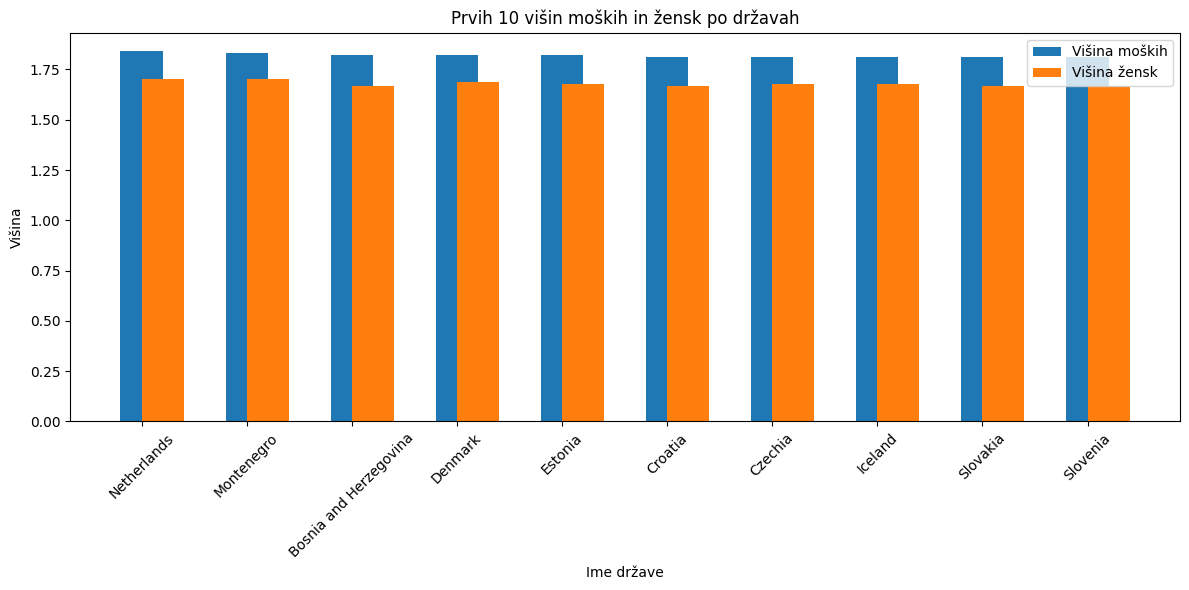

In [395]:
top_10_male_heights = countries.groupby('ime države')['višina moških'].mean().nlargest(10)
female_heights = countries.groupby('ime države')['višina žensk'].mean()

female_heights_sorted = female_heights[top_10_male_heights.index] # priredimo desetim največjim moškim višinam ustrezne ženske višine

plt.figure(figsize=(12, 6))

plt.bar(top_10_male_heights.index, top_10_male_heights, width=0.4, label='Višina moških')
plt.bar(top_10_male_heights.index, female_heights_sorted, width=0.4, align='edge', label='Višina žensk')

plt.xlabel('Ime države')
plt.ylabel('Višina')
plt.title('Prvih 10 višin moških in žensk po državah')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


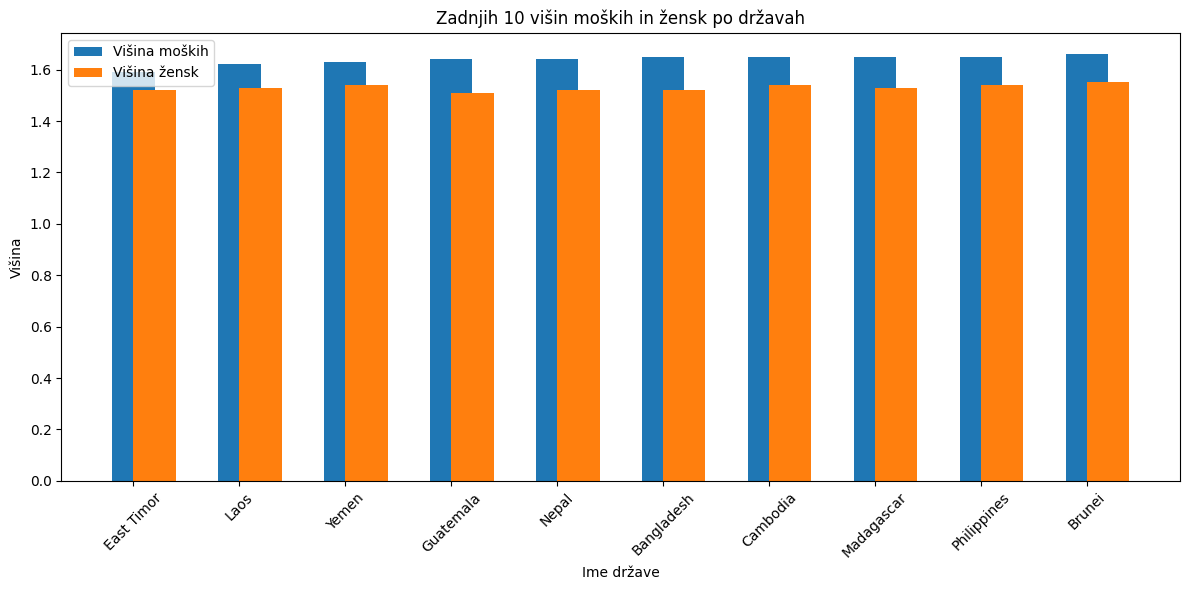

In [396]:
bottom_10_male_heights = countries.groupby('ime države')['višina moških'].mean().nsmallest(10)
female_heights = countries.groupby('ime države')['višina žensk'].mean()

female_heights_sorted = female_heights[bottom_10_male_heights.index]

plt.figure(figsize=(12, 6))

plt.bar(bottom_10_male_heights.index, bottom_10_male_heights, width=0.4, label='Višina moških')
plt.bar(bottom_10_male_heights.index, female_heights_sorted, width=0.4, align='edge', label='Višina žensk')

plt.xlabel('Ime države')
plt.ylabel('Višina')
plt.title('Zadnjih 10 višin moških in žensk po državah')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### 2.1.2. Razlike višin med spoloma

Naslednji računi prikazujejo, kolikšna je povprečna višina moškega in ženske glede na obravnavane države, za koliko se ti dve vrednosti razlikujeta in za kolikšen delež so povprečno moški višji od žensk ter kje se pojavi največja razlika med spoloma in kolikšna je. Opazimo, da so moški povprečno visoki 1.74 m, ženske 1.61 m, da so moški v primerjavi z ženskami za 13 cm višji in da so moški po državah povprečno 8.07 % višji od žensk. Največja razlika med višino moških in žensk je se je izkazala v državi Puerto Rico in znaša 0.16 m.



In [417]:
columns_to_keep = ['ime države', 'višina moških', 'višina žensk']

columns_to_drop = [col for col in countries.columns if col not in columns_to_keep] #odstranimo stolpce, ki jih ne želimo

countries.drop(columns=columns_to_drop, inplace=True)

print(countries)


      ime države  višina moških  višina žensk
124    Guatemala           1.64          1.51
127   East Timor           1.59          1.52
123        Nepal           1.64          1.52
122   Bangladesh           1.65          1.52
126         Laos           1.62          1.53
..           ...            ...           ...
3        Estonia           1.82          1.68
18        Latvia           1.80          1.68
4        Denmark           1.82          1.69
2     Montenegro           1.83          1.70
1    Netherlands           1.84          1.70

[127 rows x 3 columns]


In [398]:
average_world_male_height = round(np.mean(countries['višina moških']), 2)
average_world_female_height = round(np.mean(countries['višina žensk']), 2)

print('Povprečna višina moškega glede na vse države je', average_world_male_height, 'm.')
print('Povprečna višina ženske glede na vse države je', average_world_female_height, 'm.')


Povprečna višina moškega glede na vse države je 1.74 m.
Povprečna višina ženske glede na vse države je 1.61 m.


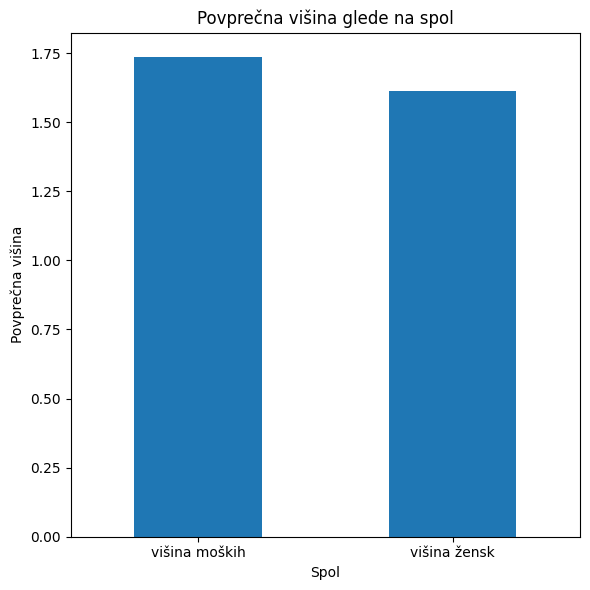

In [399]:
average_height = countries[['višina moških', 'višina žensk']].mean()

plt.figure(figsize=(6, 6))
average_height.plot(kind='bar')
plt.xlabel('Spol')
plt.ylabel('Povprečna višina')
plt.title('Povprečna višina glede na spol')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Koliko so moški večji od žensk?

In [400]:
rounded_height_difference = round(average_world_male_height - average_world_female_height, 2)

print('Razlika med višino moških in žensk je', rounded_height_difference, 'm.')


Razlika med višino moških in žensk je 0.13 m.


In [401]:
percentage_men_taller = (rounded_height_difference / average_world_female_height) * 100

print('Moški so po državah povprečno', round(percentage_men_taller, 2), '% višji od žensk.')


Moški so po državah povprečno 8.07 % višji od žensk.


Kolikšne so največje razlike med višinami in v katerih državah so?

In [402]:
countries['razlika višin'] = abs(countries['višina moških'] - countries['višina žensk'])
countries_ordered_by_height_difference = countries.sort_values(by='razlika višin', ascending=False)

countries_and_height_differences = countries_ordered_by_height_difference[['ime države', 'razlika višin']]

print('Tabela držav z največjimi razlikami višin:')
print(countries_and_height_differences)


Tabela držav z največjimi razlikami višin:
                 ime države  razlika višin
24              Puerto Rico           0.16
32                  Lebanon           0.15
15                   Poland           0.15
5    Bosnia and Herzegovina           0.15
21                  Belgium           0.15
..                      ...            ...
125                   Yemen           0.09
87                     Chad           0.09
95                 Kiribati           0.09
84                   Tuvalu           0.08
127              East Timor           0.07

[127 rows x 2 columns]


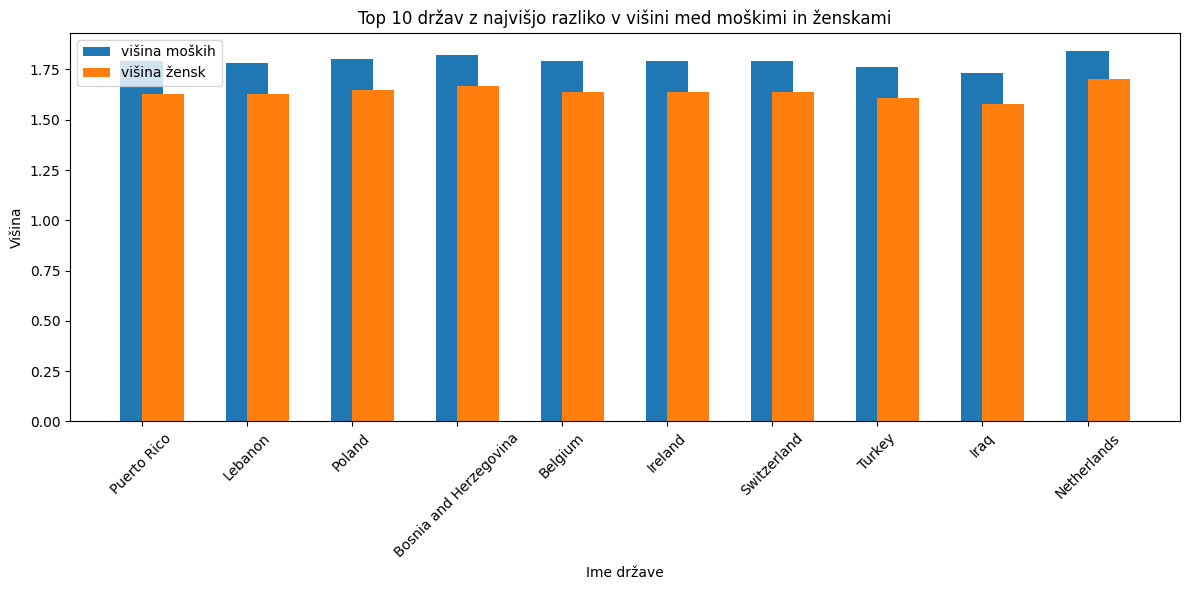

In [403]:
plt.figure(figsize=(12, 6))

plt.bar(countries_ordered_by_height_difference['ime države'].head(10), countries_ordered_by_height_difference['višina moških'].head(10), width=0.4, label='višina moških')
plt.bar(countries_ordered_by_height_difference['ime države'].head(10), countries_ordered_by_height_difference['višina žensk'].head(10), width=0.4, align='edge', label='višina žensk')

plt.xlabel('Ime države')
plt.ylabel('Višina')
plt.title('Top 10 držav z najvišjo razliko v višini med moškimi in ženskami')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

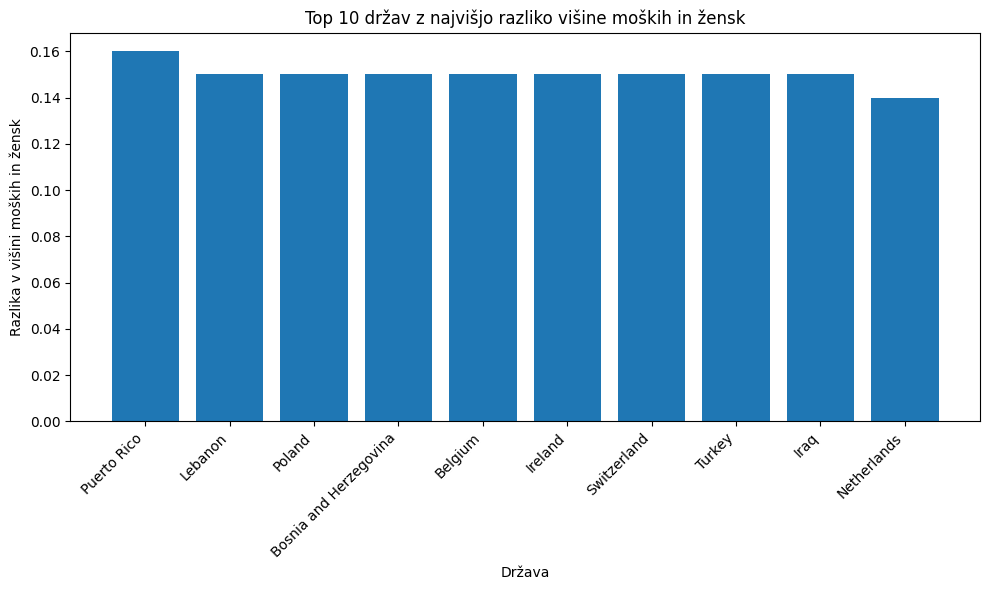

In [404]:
plt.figure(figsize=(10, 6))
plt.bar(countries_ordered_by_height_difference['ime države'].head(10), countries_ordered_by_height_difference['razlika višin'].head(10))
plt.xlabel('Država')
plt.ylabel('Razlika v višini moških in žensk')
plt.title('Top 10 držav z najvišjo razliko višine moških in žensk')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [405]:
max_height_difference = round(np.max(np.abs(countries['višina moških'] - countries['višina žensk'])), 2)

#poiščemo vrstico
max_height_row = countries.loc[np.abs(countries['višina moških'] - countries['višina žensk']).idxmax()]

# poiščemo državo
country_with_max_height_difference = max_height_row['ime države']

print('Največja razlika med višino moških in žensk je', max_height_difference, 'm.')
print('Ta razlika je prisotna na območju:', country_with_max_height_difference)

Največja razlika med višino moških in žensk je 0.16 m.
Ta razlika je prisotna na območju: Puerto Rico


### 2.2. Kontinenti

#### 2.2.1. Primerjava prvih in zadnjih 10 delov kontinentov

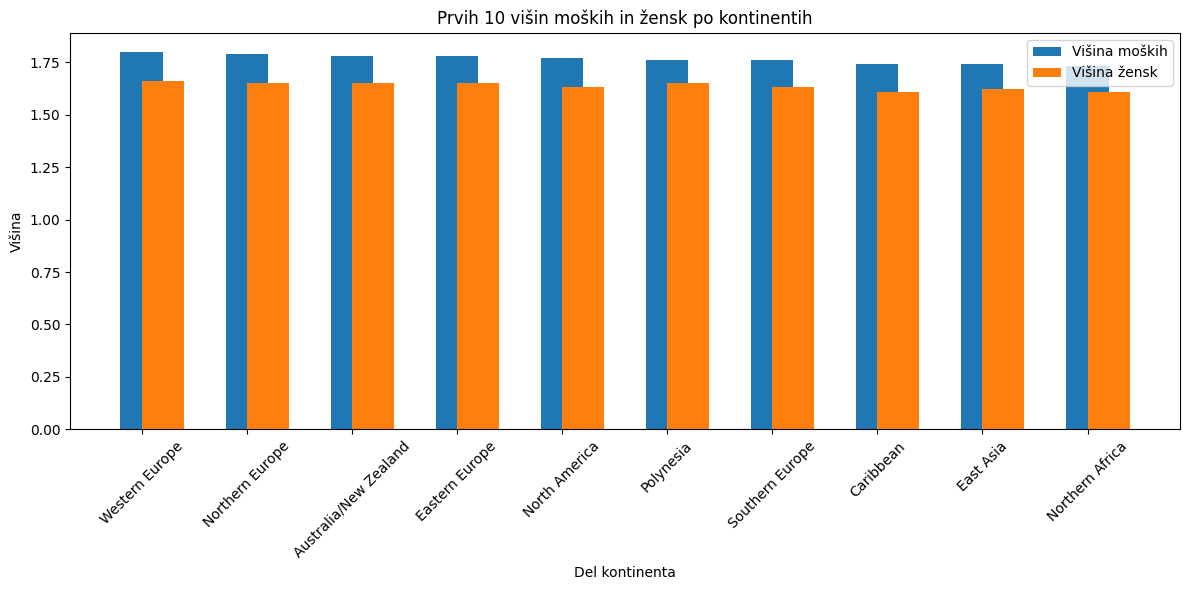

In [406]:
top_10_male_heights_continents = continents.groupby('del kontinenta')['višina moških'].mean().nlargest(10)
female_heights_continents = continents.groupby('del kontinenta')['višina žensk'].mean()

female_heights_sorted_continents = female_heights_continents[top_10_male_heights_continents.index] # priredimo desetim največjim moškim višinam ustrezne ženske višine

plt.figure(figsize=(12, 6))

plt.bar(top_10_male_heights_continents.index, top_10_male_heights_continents, width=0.4, label='Višina moških')
plt.bar(top_10_male_heights_continents.index, female_heights_sorted_continents, width=0.4, align='edge', label='Višina žensk')

plt.xlabel('Del kontinenta')
plt.ylabel('Višina')
plt.title('Prvih 10 višin moških in žensk po kontinentih')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

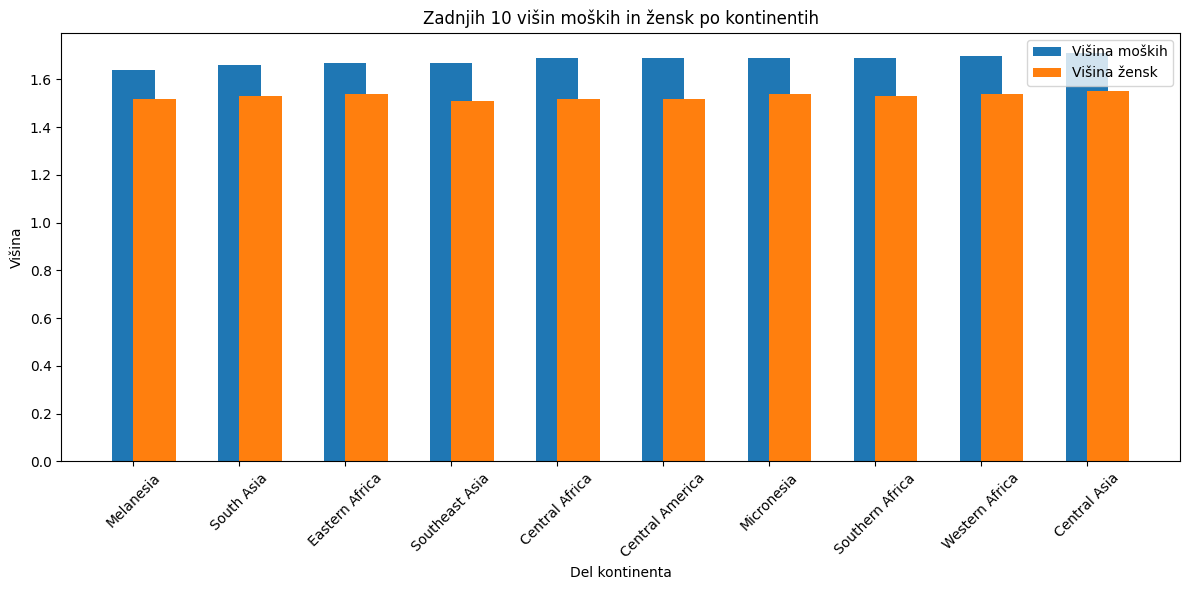

In [407]:
bottom_10_male_heights_continents = continents.groupby('del kontinenta')['višina moških'].mean().nsmallest(10)
female_heights_continents = continents.groupby('del kontinenta')['višina žensk'].mean()

female_heights_sorted_continents = female_heights[bottom_10_male_heights.index]

plt.figure(figsize=(12, 6))

plt.bar(bottom_10_male_heights_continents.index, bottom_10_male_heights_continents, width=0.4, label='Višina moških')
plt.bar(bottom_10_male_heights_continents.index, female_heights_sorted_continents, width=0.4, align='edge', label='Višina žensk')

plt.xlabel('Del kontinenta')
plt.ylabel('Višina')
plt.title('Zadnjih 10 višin moških in žensk po kontinentih')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### 2.2.2. Razlike višin med spoloma

Analogno kot pri državah sem naredila račune, kolikšna je povprečna višina moškega in ženske glede na dele kontinentov, za koliko se ti dve vrednosti razlikujeta in za kolikšen delež so povprečno moški višji od žensk ter kje se pojavi največja razlika med spoloma in kolikšna je. Opazimo, da so moški povprečno visoki 1.72 m, ženske 1.6 m, da so moški v primerjavi z ženskami za 12 cm višji in da so moški po državah povprečno 7.5 % višji od žensk. Največja razlika med višino moških in žensk je se je izkazala v severni Ameriki in v severni ter zahodni Evropi in znaša 0.14 m.



In [408]:
columns_to_keep = ['del kontinenta', 'višina moških', 'višina žensk']

columns_to_drop = [col for col in continents.columns if col not in columns_to_keep] #odstranimo stolpce, ki jih ne želimo

continents.drop(columns=columns_to_drop, inplace=True)

print(continents)


           del kontinenta  višina moških  višina žensk
12             South Asia           1.66          1.55
14         Southeast Asia           1.67          1.55
21              Melanesia           1.64          1.57
2          Eastern Africa           1.67          1.57
9         Central America           1.69          1.57
..                    ...            ...           ...
18        Northern Europe           1.79          1.65
20              Polynesia           1.76          1.65
19         Eastern Europe           1.78          1.65
15  Australia/New Zealand           1.78          1.65
16         Western Europe           1.80          1.66

[22 rows x 3 columns]


In [409]:
average_world_male_height_c = round(np.mean(continents['višina moških']), 2)
average_world_female_height_c = round(np.mean(continents['višina žensk']), 2)

print('Povprečna višina moškega glede na kontinente je', average_world_male_height_c, 'm.')
print('Povprečna višina ženske glede na kontinente je', average_world_female_height_c, 'm.')

Povprečna višina moškega glede na kontinente je 1.72 m.
Povprečna višina ženske glede na kontinente je 1.6 m.


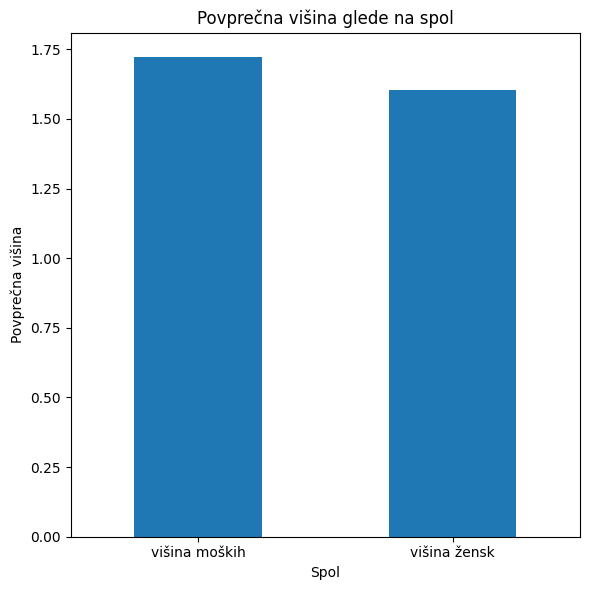

In [410]:
average_height = continents[['višina moških', 'višina žensk']].mean()

plt.figure(figsize=(6, 6))
average_height.plot(kind='bar')
plt.xlabel('Spol')
plt.ylabel('Povprečna višina')
plt.title('Povprečna višina glede na spol')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Koliko so moški večji od žensk?

In [411]:
rounded_height_difference_c = round(average_world_male_height_c - average_world_female_height_c, 2)

print('Razlika med višino moških in žensk je', rounded_height_difference_c, 'm.')


Razlika med višino moških in žensk je 0.12 m.


In [412]:
prounded_height_difference_c = (rounded_height_difference_c / average_world_female_height_c) * 100

print('Moški so po kontinentih povprečno', round(percentage_men_taller_c, 2), '% višji od žensk.')

Moški so po kontinentih povprečno 7.5 % višji od žensk.


Kolikšne so največje razlike med višinami in v katerih delih kontinentov so?

In [413]:
continents['razlika višin'] = abs(continents['višina moških'] - continents['višina žensk'])
continents_ordered_by_height_difference = continents.sort_values(by='razlika višin', ascending=False)

continents_and_height_differences = continents_ordered_by_height_difference[['del kontinenta', 'razlika višin']]

print('Tabela delov kontinentov z največjimi razlikami višin:')
print(continents_and_height_differences)

Tabela delov kontinentov z največjimi razlikami višin:
           del kontinenta  razlika višin
16         Western Europe           0.14
18        Northern Europe           0.14
7           North America           0.14
15  Australia/New Zealand           0.13
19         Eastern Europe           0.13
..                    ...            ...
12             South Asia           0.11
4         Southern Africa           0.10
22             Micronesia           0.10
2          Eastern Africa           0.10
21              Melanesia           0.07

[22 rows x 2 columns]


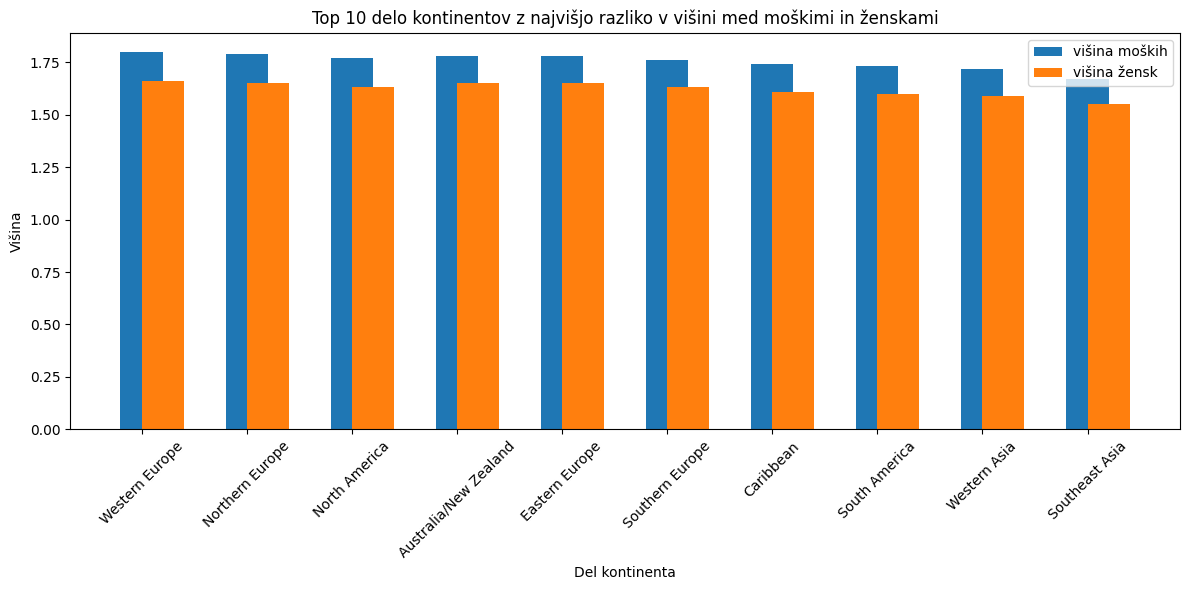

In [414]:
plt.figure(figsize=(12, 6))

plt.bar(continents_ordered_by_height_difference['del kontinenta'].head(10), continents_ordered_by_height_difference['višina moških'].head(10), width=0.4, label='višina moških')
plt.bar(continents_ordered_by_height_difference['del kontinenta'].head(10), continents_ordered_by_height_difference['višina žensk'].head(10), width=0.4, align='edge', label='višina žensk')

plt.xlabel('Del kontinenta')
plt.ylabel('Višina')
plt.title('Top 10 delo kontinentov z najvišjo razliko v višini med moškimi in ženskami')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

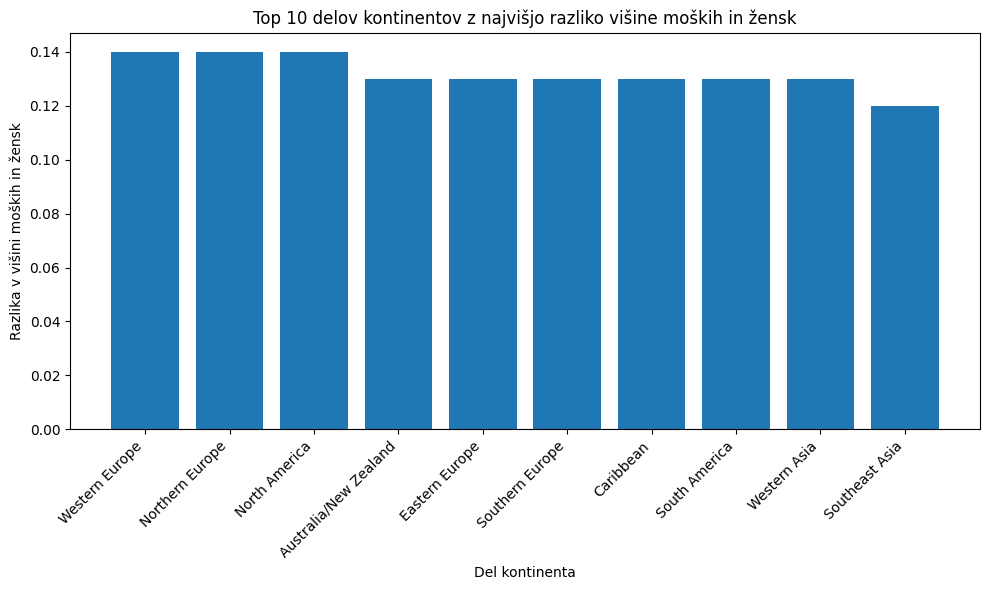

In [415]:
plt.figure(figsize=(10, 6))
plt.bar(continents_ordered_by_height_difference['del kontinenta'].head(10), continents_ordered_by_height_difference['razlika višin'].head(10))
plt.xlabel('Del kontinenta')
plt.ylabel('Razlika v višini moških in žensk')
plt.title('Top 10 delov kontinentov z najvišjo razliko višine moških in žensk')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Kje je največja razlika med moškimi in ženskami in kolikšna je?

In [416]:
def print_max_height_difference(continents):
    # najprej najdemo največjo razliko s funkcijo max
    max_height_difference = continents['razlika višin'].max()
    
    # pošičemo del kontinenta z največjo razliko
    max_height_rows = continents[continents['razlika višin'] == max_height_difference]
    continents_with_max_height_difference = ', '.join(max_height_rows['del kontinenta'])
    
    
    print(f'Največja razlika med višino moških in žensk je {max_height_difference:.2f} m.')
    print(f'Ta razlika je prisotna na območju: {continents_with_max_height_difference}')

print_max_height_difference(continents)


Največja razlika med višino moških in žensk je 0.14 m.
Ta razlika je prisotna na območju: North America, Northern Europe, Western Europe
